In [12]:
import torch
import pandas as pd

# Generate Dataset

In [82]:
sensus = {
    "tinggi": [158,170,183,191,155,163,180,158,178],
    "berat": [64,86,84,80,49,59,67,54,67],
    "jk": [
        "pria","pria","pria","pria","wanita","wanita","wanita","wanita","wanita"
    ]
}

In [83]:
sensus_df = pd.DataFrame(sensus)


# Visualisasi Dataset

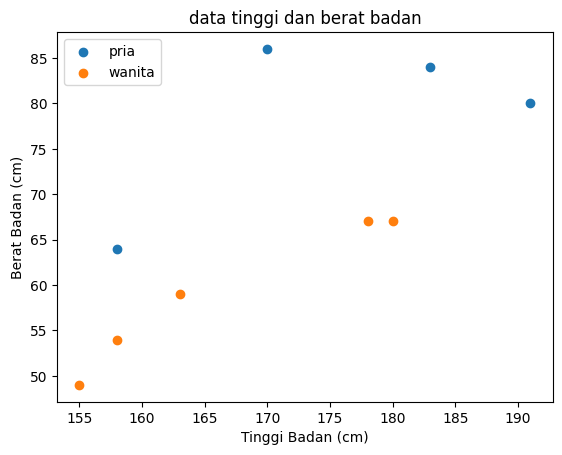

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for jk, d in sensus_df.groupby("jk"):
    ax.scatter(d["tinggi"], d["berat"], label=jk)

plt.legend(loc="upper left")
plt.title("data tinggi dan berat badan")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Berat Badan (cm)")
plt.show()


# Convert From Dataframe into Numpy Array

In [107]:
import numpy as np

X_train = sensus_df[["tinggi", "berat"]]
y_train = sensus_df[["jk"]]

# Convert from DataFrame to numpy 
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train)
print(y_train)


[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]
[['pria']
 ['pria']
 ['pria']
 ['pria']
 ['wanita']
 ['wanita']
 ['wanita']
 ['wanita']
 ['wanita']]


# Convert string into Number

In [121]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

In [124]:
# Convert from numpy to Tensor
# X_trainTensor = torch.tensor(X_train)
# The contents of Tensor must be number
# y_trainTensor = torch.tensor(y_train)

In [125]:
# Convert from more dimension to one dimension
y_train = y_train.flatten()

print(y_train)

[0 0 0 0 1 1 1 1 1]


# Training KNN Classification Model

In [126]:
from sklearn.neighbors import KNeighborsClassifier

x = 3
model = KNeighborsClassifier(n_neighbors=x)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Prediksi Jenis Kelamin

In [129]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1,-1)
print(X_new)

[[155  70]]


In [137]:
y_new = model.predict(X_new)


print(y_new)

[1]


In [150]:
lb.inverse_transform(y_new)

array([1])

# Visualisasi Nearest Neighbours

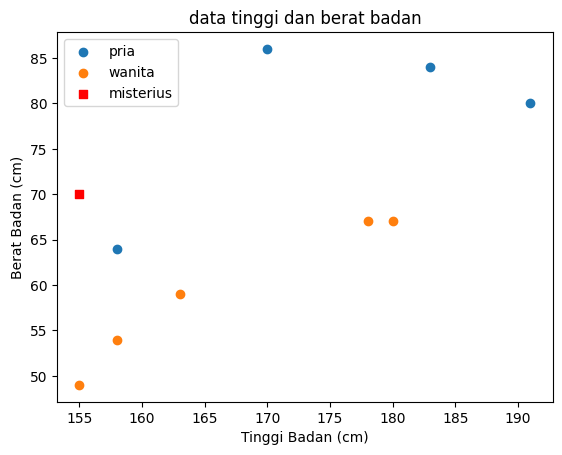

In [151]:
fig, ax = plt.subplots()

for jk, d in sensus_df.groupby("jk"):
    ax.scatter(d["tinggi"], d["berat"], label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker="s",
            color="red",
            label="misterius")

plt.legend(loc="upper left")
plt.title("data tinggi dan berat badan")
plt.xlabel("Tinggi Badan (cm)")
plt.ylabel("Berat Badan (cm)")
plt.show()

# Kalkulasi Distance (Euclidean Distance)

In [153]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [155]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]])

In [158]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]

data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [229]:
sensus_df["jarak"] = data_jarak
sensus_df = sensus_df.sort_values(["jarak"])

print(sensus_df)

   tinggi  berat      jk      jarak
0     158     64    pria   6.708204
8     178     67  wanita  13.601471
7     158     54  wanita  16.278821
1     170     86    pria  21.000000
5     163     59  wanita  21.931712
3     191     80    pria  23.194827
6     180     67  wanita  25.179357
2     183     84    pria  31.304952
4     155     49  wanita  37.363083
